#Распознание объектов на изображениях из набора данных CIFAR-10

In [ ]:
!pip uninstall scipy

Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1


In [ ]:
!pip install scipy==1.2.0

     |████████████████████████████████| 26.6MB 108kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

In [ ]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений 
img_rows, img_cols = 32,32
# Количество каналов в изображений: RGB
img_channels = 3
# Названия класов из набора данных CIFAR-10
classes = ['самолет','автомобиль','птица','кот','олень','собака','лягушка','лошадь','корабль','грузовик']

## Подготовка данных

In [ ]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


*Просмотр примеров данных*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  


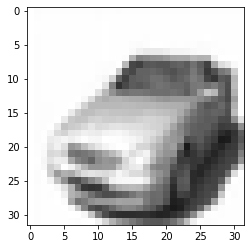

Номер класса: [1]
Тип объекта: автомобиль


In [ ]:
n = 9595
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:",y_train[n])
print("Тип объекта:",classes[y_train[n][0]])

*Нормализуем данные*

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


*Преобразуем правильные ответы в формат one hot encoding*

In [ ]:
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

*Печатаем информацию о сети*

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

*Компилируем модель*

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
1407/1407 - 12s - loss: 1.6027 - accuracy: 0.4084 - val_loss: 1.2038 - val_accuracy: 0.5658
Epoch 2/25
1407/1407 - 5s - loss: 1.1905 - accuracy: 0.5736 - val_loss: 1.0554 - val_accuracy: 0.6260
Epoch 3/25
1407/1407 - 5s - loss: 1.0245 - accuracy: 0.6362 - val_loss: 0.9297 - val_accuracy: 0.6840
Epoch 4/25
1407/1407 - 5s - loss: 0.9295 - accuracy: 0.6724 - val_loss: 0.7876 - val_accuracy: 0.7302
Epoch 5/25
1407/1407 - 5s - loss: 0.8585 - accuracy: 0.7002 - val_loss: 0.7540 - val_accuracy: 0.7420
Epoch 6/25
1407/1407 - 5s - loss: 0.8089 - accuracy: 0.7159 - val_loss: 0.7125 - val_accuracy: 0.7570
Epoch 7/25
1407/1407 - 5s - loss: 0.7651 - accuracy: 0.7322 - val_loss: 0.7299 - val_accuracy: 0.7500
Epoch 8/25
1407/1407 - 5s - loss: 0.7346 - accuracy: 0.7420 - val_loss: 0.6911 - val_accuracy: 0.7610
Epoch 9/25
1407/1407 - 5s - loss: 0.7027 - accuracy: 0.7520 - val_loss: 0.7143 - val_accuracy: 0.7544
Epoch 10/25
1407/1407 - 5s - loss: 0.6742 - accuracy: 0.7600 - val_loss: 0.6683 -

## Оцениваем качеcтво обучения сети

In [ ]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 78.51%


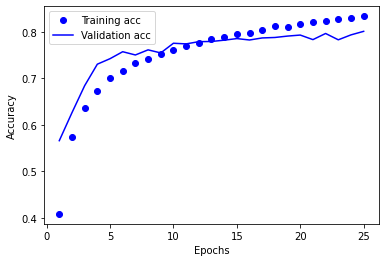

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [ ]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [ ]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [ ]:
from google.colab import files

In [ ]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("cifar10_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Применяем сеть для распознавания объектов на изображениях

*Просмотр изображения из набора данных для тестирования*

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `toimage` is deprecated!
    `toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use Pillow's ``Image.fromarray`` directly instead.
  


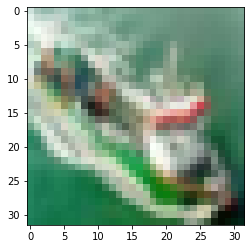

In [ ]:
index=15
plt.imshow(toimage(X_test[index]))
plt.show()

*Преобразование тестового изображения*

In [ ]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

*Запуск распознавания*

In [ ]:
prediction = model.predict(x)

*Печатаем результаты распознавания*

In [ ]:
print(prediction)

[[5.9365161e-04 3.5846472e-06 1.9702397e-02 1.2902904e-03 3.4469474e-04
  4.0543719e-06 9.2064017e-01 1.3520126e-09 5.7420917e-02 2.4243337e-07]]


*Преобразуем результаты из формата one hot encoding*

In [ ]:
prediction = np.argmax(prediction)
print(classes[prediction])

лягушка


*Печатаем правильный ответ*

In [ ]:
print(classes[y_test[index][0]])

корабль


## Распознаем дополнительное изображение

In [ ]:
from google.colab import files

files.upload()

Saving cat.PNG to cat.PNG


{'cat.PNG': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xde\x00\x00\x00\x9c\x08\x06\x00\x00\x00\x10\xf7\x15\xd0\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^\xec\xbd\x85w\\G\xbe\xb5\x9d\t\x83cf\xb6\xc5\xcc\xcc\xcc\xcc\xcc\xcc\xcc\xccd\xd9\xb2$[f\xcb\xcc\xcc\x10\xb3cf\'\xb1\xc38s\xbf?b\x7f\xbbJ\x92#+J\xe2Lf\xee\xcd\xbd\xefh\xad\xdfju\xf7\xe9\xd3\xad\xd6yj\xef]U\xa7\xcek\x9f>}\x88\xf1\xea\xb3O\x1e\xc9z\xf6\xe9c<\xfb\xec\xc9\xcb\xc5\xc7F\x9e\xff\xcd\xfa\x8c\xdbq\xfb\x91\xfa\xc5~^\xa5\xc4{\r\xd7\xe8\xcf\xf2\xfc\xd9SY\x9f?\xffD\xd6\x97\x9f\x7f\xfaj\xf5\xc5g\xf8\xeaO\xd6\xd7_>\xfbc\xf5\xd5s|\xf3\xf5\xe7\xbfY\xdf~\xf3\xc5\xef\xd7x\xaf\x135\xde\xb6\xe3\xd4w\xdf~\xf9\x9b\xf5\xfdw_\xe1\x87\xdf\xa9\x1f\xbf\xff\xfa7\xeb\x07Q\xc3\xdb}\xff=\xf7\xfb\xdd\xd7\xf8\x96\xf7\xbf\xe7\xed\x8f\xdf~\x85\xbf\x7f\xc5\xcf\xf2\xc9\x03\xdc\xbbt\x16\xa7vo\xc1\x81\xcdM8\xb0\xb1\x12\xf

*Проверяем загрузку файлов*

In [ ]:
!ls

cat.PNG  cifar10_model.h5  cifar10_model.json  sample_data


*Смотрим загруженную картинку*

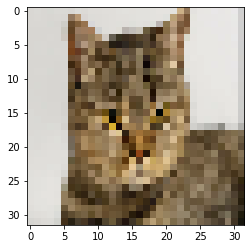

In [ ]:
img_path = 'cat.PNG'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

*Преобразуем картинку в массив для распознавания*

In [ ]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

*Запускаем распознавание*

In [ ]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

кот
